In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

In [6]:
def gaussian_smoothing(input_img):
                                
    gaussian_filter=np.array([[0.109,0.111,0.109],
                              [0.111,0.135,0.111],
                              [0.109,0.111,0.109]])
                                
    return cv2.filter2D(input_img,-1,gaussian_filter)  

In [7]:
def canny_edge_detection(input):
    
    input = input.astype('uint8')

    # Using OTSU thresholding - bimodal image
    otsu_threshold_val, ret_matrix = cv2.threshold(input,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    lower_threshold = otsu_threshold_val * 0.6
    upper_threshold = otsu_threshold_val * 1.6
    
    print(lower_threshold,upper_threshold)
    
    edges = cv2.Canny(input, lower_threshold, upper_threshold)
    return edges

In [8]:
def HoughCircles(input,circles,acc_cells_total): 
    rows, cols = input.shape
    
    # initializing the angles to be computed 
    angles = np.arange(360)
    sinang = np.sin(angles*np.pi/180)
    cosang = np.cos(angles*np.pi/180)
           
    # initializing the different radius
    #For Generic Images
    length=int(rows/2)
    radius = [i for i in range(20,26)]
       
    # Initial threshold value 
    threshold = 125 
    
    nrows = 3
    ncols = 4
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
      
    for i,r in enumerate(radius):
        #Initializing an empty 2D array with zeroes 
        acc_cells = np.zeros((rows,cols),dtype=np.uint64)
         
        # Iterating through the original image 
        for x in range(rows): 
            for y in range(cols): 
                if input[x][y] == 255:# edge 
                    # increment in the accumulator cells 
                    for angle in range(0,360): 
                        b = int(y - round(r * sinang[angle]))
                        a = int(x - round(r * cosang[angle]))
                        #print(a,b)
                        if a >= 0 and a < rows and b >= 0 and b < cols: 
                            acc_cells[a][b] += 1
              # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)
        plt.imshow(acc_cells,cmap='gray') 
        plt.title('Accumulator for radius: {}'.format(r))
        
        print('For radius: ',r)
        acc_cell_max = np.amax(acc_cells)
        print('max acc value: ',acc_cell_max)
        
        if(acc_cell_max > threshold):  

            print("Detecting the circles for radius: ",r)       
            
            # Initial threshold
            acc_cells_total +=acc_cells
            
            # find the circles for this radius 
            for i in range(1,rows-1): 
                for j in range(1,cols-1): 
                    if(acc_cells[i][j] >= threshold):
                        circles.append((i,j,r))                        
    plt.show()
    
    return acc_cells

In [1]:
filename = 'cable.png'
img_path = 'HoughCircles/'+filename

img = cv2.imread(img_path,0)
plt.imshow(img,cmap='gray')

NameError: name 'cv2' is not defined

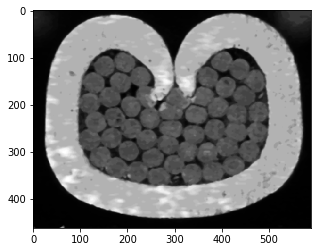

In [9]:
#Steps
#1. Denoise using Gaussian filter and detect edges using canny edge detector
smoothed_img = gaussian_smoothing(img)
plt.imshow(smoothed_img,cmap='gray')

61.8 164.8


(-0.5, 589.5, 461.5, -0.5)

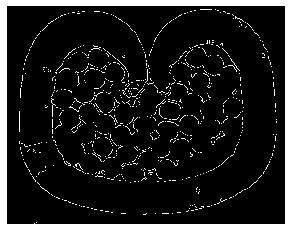

In [10]:
#2. Detect Edges using Canny Edge Detector
edged_image = canny_edge_detection(smoothed_img)
plt.imshow(edged_image,cmap='gray')
plt.axis('off')
#plt.savefig('3_hough_hiuh69/edge_map_'+filename,bbox_incles='tight')

In [ ]:
#3. Perform Circle Hough Transform
circles = []
acc_cells_total = np.zeros((img.shape))
# cv2.imshow('Circle Detected Image',edged_image)

# Detect Circle 
acc = HoughCircles(edge,circles,acc_cells_total)  

In [ ]:
plt.imshow(acc_cells_total,cmap='gray')
plt.axis('off')
plt.savefig('HoughCircles/accumulator_'+filename,bbox_incles='tight')

In [ ]:
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for vertex in circles:
    cv2.circle(output,(vertex[1],vertex[0]),vertex[2],(0,255,0),1)

plt.imshow(output,cmap='gray')
plt.axis('off')
plt.savefig('HoughCircles/CircularObjects_'+filename,bbox_incles='tight')

In [20]:
#img = cv2.imread('opencv_logo.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,50,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
?cv2.HoughCircles